In [17]:
from sklearn.datasets import load_wine
wine_dataset = load_wine()

# Изучаем данные 
# Набор данных по распознаванию вин

In [3]:
print(f"Ключи digits_dataset: \n{wine_dataset.keys()}")

Ключи digits_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [4]:
print(wine_dataset['DESCR'][:300])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		-


In [5]:
print(f"Названия ответов: \n{wine_dataset['target_names']}")

Названия ответов: 
['class_0' 'class_1' 'class_2']


In [7]:
result = wine_dataset['feature_names']
print(f"Названия признаков: \n{result}")

Названия признаков: 
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [8]:
print(f"Строки из массива data: \n{wine_dataset['data']}")

Строки из массива data: 
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [9]:
print(f"Форма миссива data: \n{wine_dataset['data'].shape}")

Форма миссива data: 
(178, 13)


In [10]:
print(f"Форма массива target: \n{wine_dataset['target'].shape}")

Форма массива target: 
(178,)


In [11]:
print(f"Ответы: \n{wine_dataset['target']}")

Ответы: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


# Разделим данные на обучающий и тестовые наборы

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(wine_dataset['data'], wine_dataset['target'], random_state=0)

In [13]:
print(f"Форма массива x_train: {x_train.shape}")
print(f"Форма массива y_train: {y_train.shape}")

Форма массива x_train: (133, 13)
Форма массива y_train: (133,)


In [14]:
print(f"Форма массива x_test: {x_test.shape}")
print(f"Форма массива y_test: {y_test.shape}")

Форма массива x_test: (45, 13)
Форма массива y_test: (45,)


# Иследуем данные с помощью визуализации

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

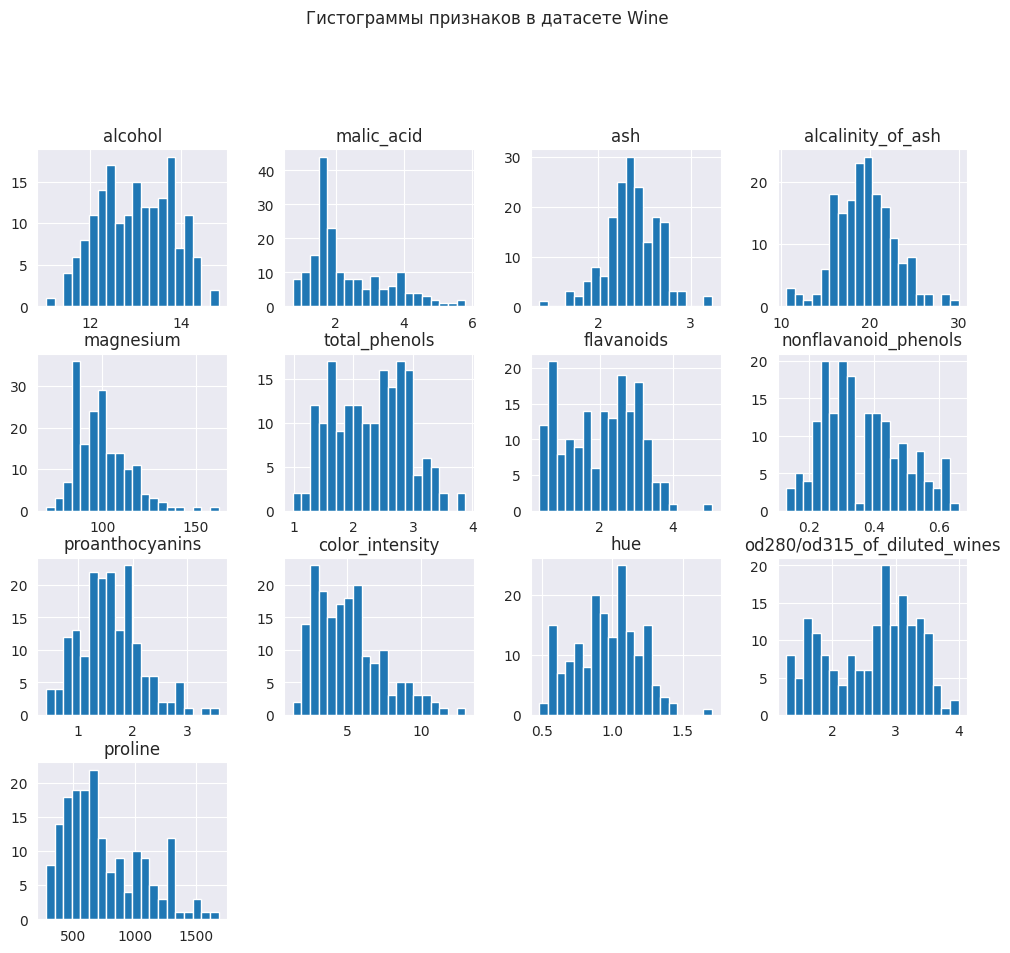

In [19]:
wine_df = pd.DataFrame(data=wine_dataset.data, columns=wine_dataset.feature_names)
wine_df.hist(bins=20, figsize=(12, 10))
plt.suptitle("Гистограммы признаков в датасете Wine", x=0.5, y=1.02)
plt.show()

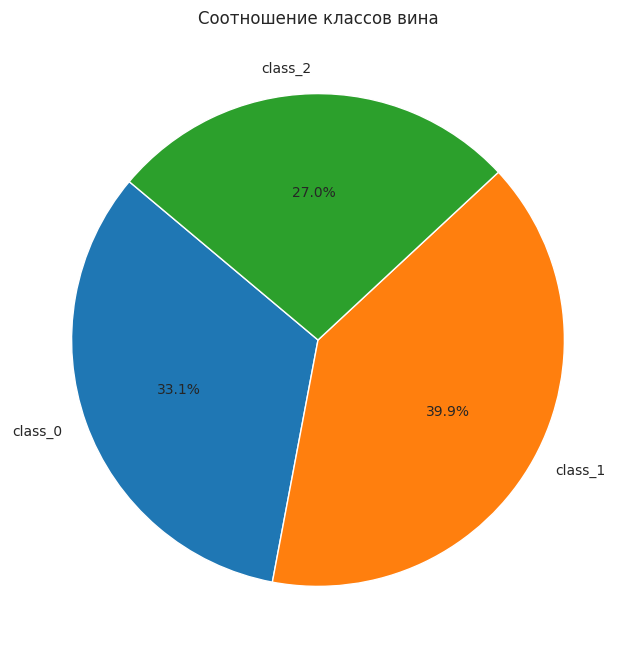

In [21]:
class_counts = wine_df.groupby(wine_dataset.target).size()

# Названия классов
class_labels = wine_dataset.target_names

# Создание круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140)
plt.title("Соотношение классов вина")
plt.show()

# Постройте модель по методу k-ближайших средних

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_k = grid_search.best_params_['n_neighbors']

print(f"Лучшее значение k-ближайших средних: {best_k}")

Лучшее значение k-ближайших средних: 1


In [24]:
knn = KNeighborsClassifier(n_neighbors=best_k)

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

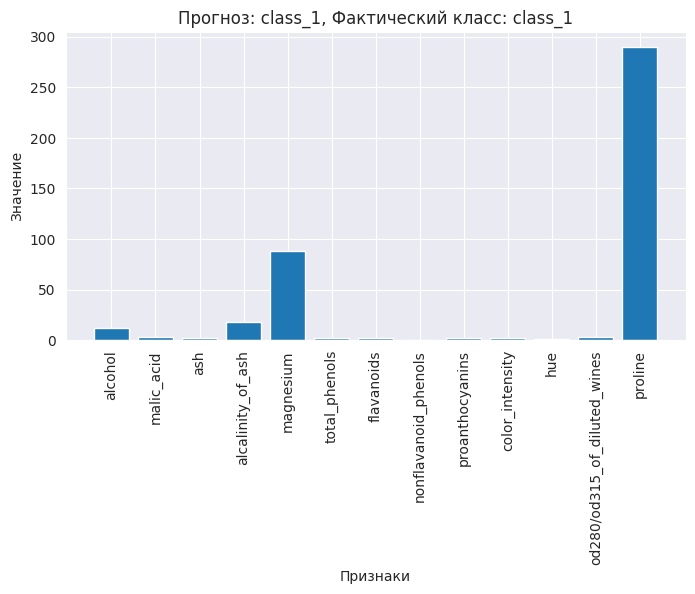

In [27]:
import random

random_index = random.randint(0, len(x_test) - 1)
sample = x_test[random_index].reshape(1, -1)
true_label = y_test[random_index]

predicted_label = knn.predict(sample)

plt.figure(figsize=(8, 4))
plt.bar(range(len(sample[0])), sample[0], tick_label=wine_dataset.feature_names)
plt.xlabel("Признаки")
plt.ylabel("Значение")
plt.title(f"Прогноз: {wine_dataset.target_names[predicted_label[0]]}, Фактический класс: {wine_dataset.target_names[true_label]}")
plt.xticks(rotation=90)
plt.show()

In [28]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy:.2f}")


Точность: 0.76


In [29]:
from sklearn.metrics import confusion_matrix, classification_report

confusion = confusion_matrix(y_test, y_pred)
print('Матрица ошибок:')
print(confusion)

# Отчет о классификации
class_report = classification_report(y_test, y_pred)
print('Отчет о классификации:')
print(class_report)

Матрица ошибок:
[[14  1  1]
 [ 1 17  3]
 [ 1  4  3]]
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.77      0.81      0.79        21
           2       0.43      0.38      0.40         8

    accuracy                           0.76        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.75      0.76      0.75        45


<h3> Оценка точности модели также была высокой, что говорит о хорошей способности классифицировать различные сорта вин.

<h3> В матрице ошибок было крайне небольшое количество неправильно классифицированных образцов, что свидетельствует о высокой точности.
